In [2]:
app_packages = ['com.nintendo.zaka','com.moonactive.coinmaster','com.roblox.client','com.king.candycrushsaga','com.tapblaze.pizzabusiness',
                'com.wildlife.games.battle.royale.free.zooba','es.socialpoint.DragonCity','com.ubisoft.hungrysharkworld','com.gameloft.android.ANMP.GloftA9HM','com.fgol.HungrySharkEvolution']

#爬取網路google play的應用程式網址: 從ID=" ~ "(第一個&前)

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm                      #進度條
import matplotlib.pyplot as plt
from google_play_scraper import Sort, reviews, app
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='zh-tw', country='tw')    #APP抓回來的原始資料
  del info['comments']                          #評論欄位暫時用不到
  app_infos.append(info)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.99it/s]


In [4]:
pd.set_option('display.max_columns',None)

app_infos_df = pd.DataFrame(app_infos)

app_infos_df

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,appId,url
0,Mario Kart Tour,■可供大家一起同樂的多人遊玩！\r\n現在可以和《瑪利歐賽車 巡迴賽》中登錄的好友或是附近的...,■可供大家一起同樂的多人遊玩！<br>現在可以和《瑪利歐賽車 巡迴賽》中登錄的好友或是附近的...,參加比賽，馳騁世界吧！,"100,000,000+",100000000,113777070,3.983448,2093323,6854,"[379839, 70438, 97964, 200617, 1344102]",0,True,TWD,False,None,None,None,True,"每個項目 $70.00 - $2,290.00","Nintendo Co., Ltd.",7277267556905944956,mariokarttour-support@nintendo.co.jp,https://mariokarttour.com/,京都府京都市南区上鳥羽鉾立町11-1,https://support.mariokarttour.com/application_...,動作,GAME_ACTION,https://play-lh.googleusercontent.com/bqGYFh6P...,https://play-lh.googleusercontent.com/zBsphZWJ...,[https://play-lh.googleusercontent.com/lvVJkJt...,https://www.youtube.com/embed/ZwEalAfEbYw?ps=p...,https://play-lh.googleusercontent.com/zBsphZWJ...,3 歲以上,None,False,False,2019年9月24日,1674636501,3.2.1,com.nintendo.zaka,https://play.google.com/store/apps/details?id=...
1,Coin Master,與你的Facebook好友以及世界各地的上百萬位玩家一起，加入攻擊、轉盤拉霸與突襲，將你的維...,與你的Facebook好友以及世界各地的上百萬位玩家一起，加入攻擊、轉盤拉霸與突襲，將你的維...,歡迎來到 Coin Master！一起冒險吧！,"100,000,000+",100000000,239899559,4.183021,8340608,23976,"[996736, 228162, 531812, 1078488, 5505196]",0,True,TWD,False,None,None,None,True,"每個項目 $33.00 - $11,600.00",Moon Active,6898760406631171989,support@coinmastergame.com,http://moonactive.zendesk.com,"Mikve Israel St 7, Tel Aviv-Yafo",https://static.moonactive.net/legal/privacy.html,休閒,GAME_CASUAL,https://play-lh.googleusercontent.com/Gpp87vMy...,https://play-lh.googleusercontent.com/fbECZUbO...,[https://play-lh.googleusercontent.com/ssCgXLy...,https://www.youtube.com/embed/STPiRTKOlyA?ps=p...,https://play-lh.googleusercontent.com/fbECZUbO...,12 歲以上,模擬賭博,False,False,2016年4月9日,1678618400,3.5.1070,com.moonactive.coinmaster,https://play.google.com/store/apps/details?id=...
2,Roblox,在 Roblox 這個終極虛擬宇宙裡，您可以創作、分享及化身為您心目中的自己。我們的全球社群...,在 Roblox 這個終極虛擬宇宙裡，您可以創作、分享及化身為您心目中的自己。我們的全球社群...,您在 Roblox 可以創作、共享體驗及化身為您心目中的自己。,"500,000,000+",500000000,716171068,4.234436,33812039,21609,"[4809517, 706557, 1118167, 2285629, 24889702]",0,True,TWD,False,None,None,None,True,"每個項目 $17.00 - $6,590.00",Roblox Corporation,5360036014478858866,info@roblox.com,http://www.roblox.com,"970 Park Place\nSan Mateo, CA 94403\n(USA)",http://www.roblox.com/info/Privacy.aspx,冒險,GAME_ADVENTURE,https://play-lh.googleusercontent.com/WNWZaxi9...,https://play-lh.googleusercontent.com/e7sQyywl...,[https://play-lh.googleusercontent.com/ELjt7-C...,https://www.youtube.com/embed/HsiMDb-mn5s?ps=p...,https://play-lh.googleusercontent.com/e7sQyywl...,12 歲以上,建議家長指導,False,False,2014年7月16日,1678986832,2.567.544,com.roblox.client,https://play.google.com/store/apps/details?id=...
3,糖果傳奇,馬上來玩《糖果傳奇》吧！這是一款鼎鼎有名的益智遊戲，全世界的百萬玩家莫不深深愛上這款遊戲。\...,馬上來玩《糖果傳奇》吧！這是一款鼎鼎有名的益智遊戲，全世界的百萬玩家莫不深深愛上這款遊戲。<...,最甜蜜的益智游戏！调换和消除糖果来闯关！,"1,000,000,000+",1000000000,1510707426,4.419023,35952528,92681,"[2735755, 742583, 1805892, 4104634, 26563488]",0,True,TWD,False,None,None,None,True,"每個項目 $30.00 - $4,990.00",King,6577204690045492686,candycrush.techhelp@king.com,http://candycrushsaga.com/help/,"King.com Limited\nAragon Business Centre, Leve...",https://king.com/privacyPolicy,休閒,GAME_CASUAL,https://play-lh.googleusercontent.com/gU9NKwpg...,https://play-lh.googleusercontent.com/nSihWGGg...,[https://play-lh.googleusercontent.com/uM9H6BM...,https://www.youtube.com/embed/mgMFtSAegVQ?ps=p...,https://play-lh.googleusercontent.com/nSihWGGg...,3 歲以上,None,True,True,2012年11月15日,1678456384,1.248.0.1,com.king.candycrushsaga,https://play.google.com/store/apps/details?id=...
4,可口的披薩，美味的披薩,想體驗開一家屬於自己的披薩店的感覺嗎 ？「可口的披薩，美味的披薩」滿足你的一切想像！盡你所能...,想體驗開一家屬於自己的披薩店的感覺嗎 ？「可口的披薩，美味的披薩」滿足你的一切想像！盡你所

In [48]:
app_infos_df['title']

0                Mario Kart Tour
1                    Coin Master
2                         Roblox
3                           糖果傳奇
4                    可口的披薩，美味的披薩
5           動物王者：趣味大逃殺遊戲 (Zooba)
6               龍城 (Dragon City)
7    飢餓鯊：世界 (Hungry Shark World)
8                     狂野飆車9：競速傳奇
9         Hungry Shark Evolution
Name: title, dtype: object

In [6]:
type(app_infos_df["title"])

pandas.core.series.Series

In [10]:
#將資料從series轉成list形式

#遊戲名稱
name = list(app_infos_df['title'])

#評分
score = list(app_infos_df['score'])
avg_score = np.mean(score)

#實際安裝
real = list(app_infos_df['realInstalls'])
avg_real = np.mean(real)

In [37]:
avg_score

4.2376419599999995

In [35]:
score_list

[3.9834476,
 4.1830215,
 4.234436,
 4.4190235,
 4.5507693,
 3.9160545,
 4.36876,
 4.3043814,
 4.0644083,
 4.3521175]

In [33]:
real_list

[113777070,
 239899559,
 716171068,
 1510707426,
 135828667,
 92591547,
 195668392,
 147946583,
 108149762,
 467068755]

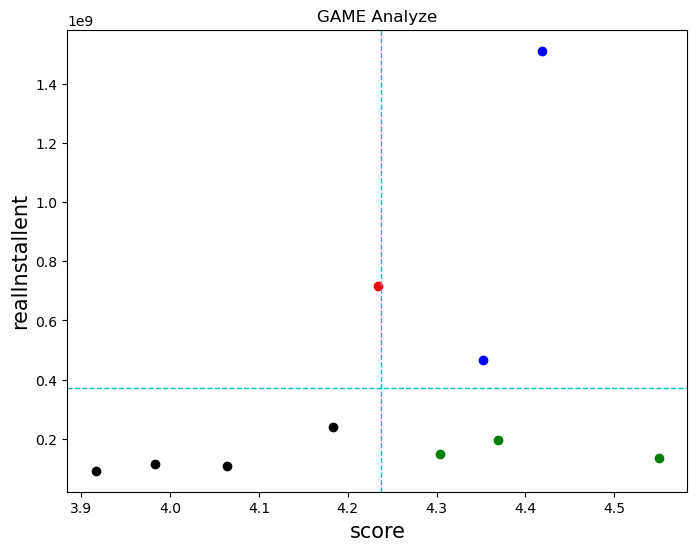

In [63]:
#繪製散佈圖
fig = plt.figure(figsize=(8,6))
score_list = []
real_list = []
axe_list = []

for i in range(len(name)):
    if (score[i] > avg_score and real[i] > avg_real):
        color = 'blue'
        axe = '1_第一象限'
    elif(score[i] <= avg_score and real[i] >= avg_real):
        color = 'red'
        axe = '2_第二象限'
    elif(score[i] <= avg_score and real[i] <= avg_real):
        color = 'black'
        axe = '3_第三象限'
    else:
        color = 'green'
        axe = '4_第四象限'
    
    plt.scatter(score[i],real[i],color=color)    #畫出各個資料點的位置
    score_list.append(score[i])
    real_list.append(real[i])
    axe_list.append(axe)

plt.axhline(avg_real,color='c',linestyle='dashed',linewidth=1)  # 利用真實的下載平均數當作中心去繪製x軸平均線 
plt.axvline(avg_score,color = 'c',linestyle='dashed',linewidth=1) #利用評價的平均當作中心去繪製y軸平均線


plt.title('GAME Analyze')
plt.xlabel('score',fontsize = 15)
plt.ylabel('realInstallent',fontsize = 15)
plt.show()

In [50]:
score_df = pd.DataFrame(score_list,columns=['評價'])
real_df = pd.DataFrame(real_list,columns = ['下載次數'])
axe_df = pd.DataFrame(axe_list,columns = ['象限'])
final = pd.concat([score_df,real_df,axe_df],axis=1)
final = final.sort_values('象限')    #利用前面故意加的數值當名稱去排序
final['名稱'] = app_infos_df['title']
final

,評價,下載次數,象限,名稱
3,4.419023,1510707426,1_第一象限,糖果傳奇
9,4.352118,467068755,1_第一象限,Hungry Shark Evolution
2,4.234436,716171068,2_第二象限,Roblox
0,3.983448,113777070,3_第三象限,Mario Kart Tour
1,4.183021,239899559,3_第三象限,Coin Master
5,3.916054,92591547,3_第三象限,動物王者：趣味大逃殺遊戲 (Zooba)
8,4.064408,108149762,3_第三象限,狂野飆車9：競速傳奇
4,4.550769,135828667,4_第四象限,可口的披薩，美味的披薩
6,4.368760,195668392,4_第四象限,龍城 (Dragon City)
7,4.304381,147946583,4_第四象限,飢餓鯊：世界 (Hungry Shark World)


In [56]:
import plotly.express as px

fig = px.scatter(final,
                x = '評價',
                y = '下載次數',
                size = '評價',
                color = '象限',
                hover_data = ['名稱'])

In [61]:
fig.update_layout(
        title = '遊戲下載次數與評價分析',
        shapes = [
            
        #設定x軸
        dict({'type':'line',
             'x0':avg_score,         #X軸座標單位
             'y0':0,
             
             'x1':avg_score,
             'y1':final['下載次數'].max(),
             'line':{
                 'color':'#FF00FF',
                 'width':5
             }
             }),
        #設定y軸
        dict({'type':'line',
             'x0':0,
             'y0':avg_real,
             
             'x1':final['評價'].max(),
             'y1':avg_real,
             'line':{
                 'color':'#FF00FF',
                 'width':5
             }
             })
        
        
        
        ]


)